In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  

# Load the dataset
df = pd.read_csv('linearFirstOrder100.csv')  # Update with your file path

# Separate features (inputs) and target (outputs)
X = df[["K", "lam1", "lam2", "w1", "w2"]]
y_sse_percentage = df["SSE%"]
y_sse = df["SSE"]
y_rise_time = df["rise_time"]

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train_sse, y_test_sse, y_train_rise_time, y_test_rise_time = train_test_split(
    X, y_sse, y_rise_time, test_size=0.2, random_state=42
)

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train polynomial regression models
poly_model_sse = LinearRegression().fit(X_train_poly, y_train_sse)
poly_model_rise_time = LinearRegression().fit(X_train_poly, y_train_rise_time)

# Predictions
y_pred_poly_sse = poly_model_sse.predict(X_test_poly)
y_pred_poly_rise_time = poly_model_rise_time.predict(X_test_poly)

# Calculate MSE
mse_poly_sse = mean_squared_error(y_test_sse, y_pred_poly_sse)
mse_poly_rise_time = mean_squared_error(y_test_rise_time, y_pred_poly_rise_time)

# Print results
print("Polynomial Regression MSE for SSE:", mse_poly_sse)
print("Polynomial Regression MSE for Rise Time:", mse_poly_rise_time)


Polynomial Regression MSE for SSE: 0.00017354857238123517
Polynomial Regression MSE for Rise Time: 62.33007764434815


In [3]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest models
rf_model_sse = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_rise_time = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the models
rf_model_sse.fit(X_train, y_train_sse)
rf_model_rise_time.fit(X_train, y_train_rise_time)

# Predictions
y_pred_rf_sse = rf_model_sse.predict(X_test)
y_pred_rf_rise_time = rf_model_rise_time.predict(X_test)

# Calculate MSE
mse_rf_sse = mean_squared_error(y_test_sse, y_pred_rf_sse)
mse_rf_rise_time = mean_squared_error(y_test_rise_time, y_pred_rf_rise_time)

# Print results
print("Random Forest MSE for SSE:", mse_rf_sse)
print("Random Forest MSE for Rise Time:", mse_rf_rise_time)


Random Forest MSE for SSE: 0.00019324735337349557
Random Forest MSE for Rise Time: 85.46574379911667


In [4]:
from xgboost import XGBRegressor

# Train XGBoost models
xgb_model_sse = XGBRegressor(n_estimators=50, random_state=42)
xgb_model_rise_time = XGBRegressor(n_estimators=50, random_state=42)

# Fit the models
xgb_model_sse.fit(X_train, y_train_sse)
xgb_model_rise_time.fit(X_train, y_train_rise_time)

# Predictions
y_pred_xgb_sse = xgb_model_sse.predict(X_test)
y_pred_xgb_rise_time = xgb_model_rise_time.predict(X_test)

# Calculate MSE
mse_xgb_sse = mean_squared_error(y_test_sse, y_pred_xgb_sse)
mse_xgb_rise_time = mean_squared_error(y_test_rise_time, y_pred_xgb_rise_time)

# Print results
print("XGBoost MSE for SSE:", mse_xgb_sse)
print("XGBoost MSE for Rise Time:", mse_xgb_rise_time)


XGBoost MSE for SSE: 0.0004110400537873266
XGBoost MSE for Rise Time: 101.95105697044379


In [11]:
import numpy as np
import pandas as pd

# Creating a DataFrame to store real vs predicted values for all models
results = pd.DataFrame()

# Actual values
results['Actual SSE'] = y_test_sse
results['Actual Rise Time'] = y_test_rise_time

# Polynomial Regression Predictions
results['Predicted SSE (Poly)'] = y_pred_poly_sse
results['Predicted Rise Time (Poly)'] = y_pred_poly_rise_time

# Random Forest Predictions
results['Predicted SSE (RF)'] = y_pred_rf_sse
results['Predicted Rise Time (RF)'] = y_pred_rf_rise_time

# XGBoost Predictions
results['Predicted SSE (XGB)'] = y_pred_xgb_sse
results['Predicted Rise Time (XGB)'] = y_pred_xgb_rise_time


In [12]:
# Save the DataFrame to a CSV file in your local system
results.to_csv('predicted_vs_actual_results.csv', index=False)

# This will create the CSV file in your current working directory
print("Results saved to 'predicted_vs_actual_results.csv'")

Results saved to 'predicted_vs_actual_results.csv'


In [6]:
# Display the results in a tabular format
# import ace_tools as tools; tools.display_dataframe_to_user(name="Regression Results", dataframe=results)

In [7]:
# Combine all actual and predicted values into a DataFrame
results = pd.DataFrame()

# Actual values
results['Actual SSE'] = y_test_sse
results['Actual Rise Time'] = y_test_rise_time

# Polynomial Regression Predictions
results['Predicted SSE (Poly)'] = y_pred_poly_sse
results['Predicted Rise Time (Poly)'] = y_pred_poly_rise_time

# Random Forest Predictions
results['Predicted SSE (RF)'] = y_pred_rf_sse
results['Predicted Rise Time (RF)'] = y_pred_rf_rise_time

# XGBoost Predictions
results['Predicted SSE (XGB)'] = y_pred_xgb_sse
results['Predicted Rise Time (XGB)'] = y_pred_xgb_rise_time

# Display the result table
print(results)

    Actual SSE%  Actual Rise Time  Predicted SSE% (Poly)  \
83     0.010541             18.65               0.009550   
53    -0.002765              3.75               0.001154   
70     0.006124             18.25              -0.000683   
45     0.000889              8.85               0.000055   
44     0.007802             19.00               0.000425   
39     0.006428             18.65               0.001806   
22    -0.004337              2.55               0.000708   
80     0.009499             19.70               0.017191   
10    -0.004098              4.65               0.000818   
0     -0.026181             12.35              -0.014050   
18    -0.001125              3.30               0.002922   
30    -0.001417              4.75               0.002512   
73     0.007880             19.10              -0.002661   
33     0.002487             17.50               0.002535   
90     0.007641             17.45              -0.001287   
4     -0.007356             11.05       

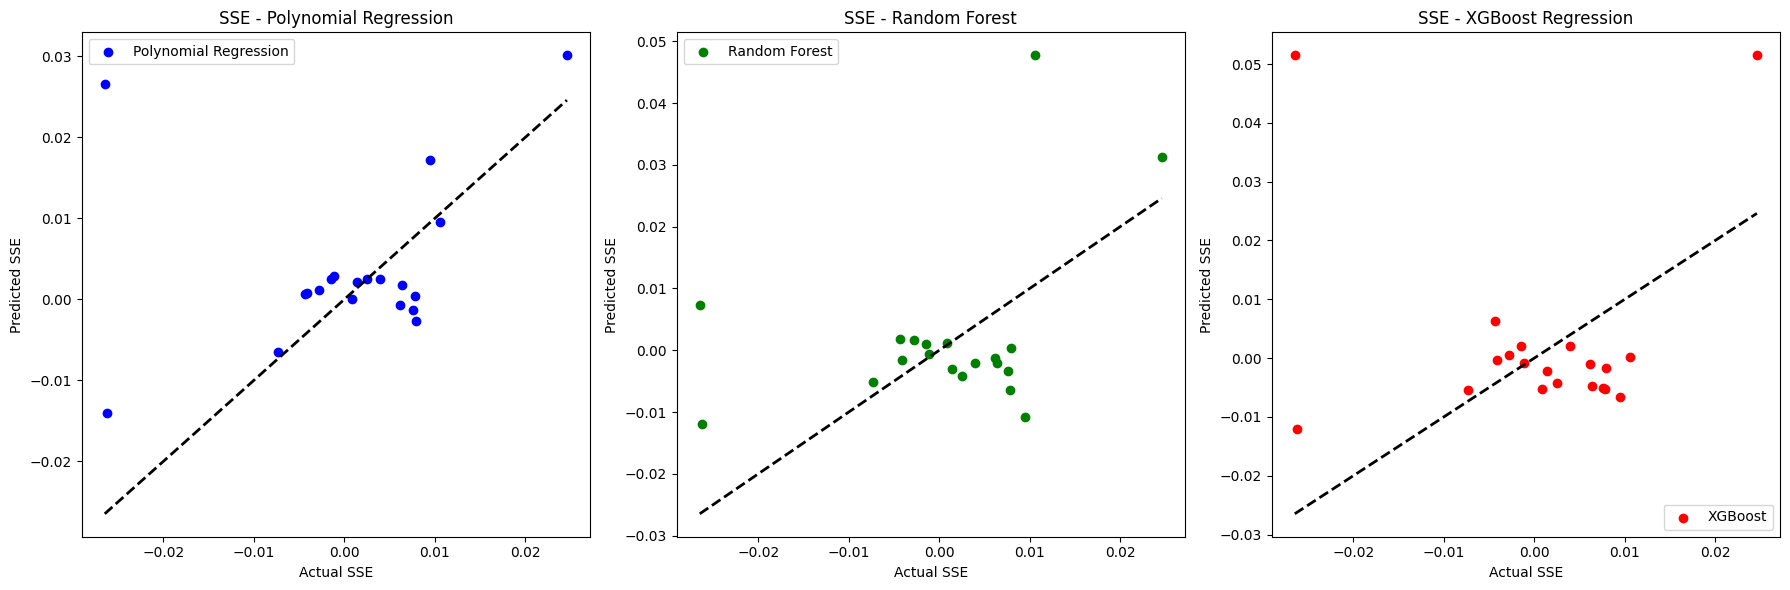

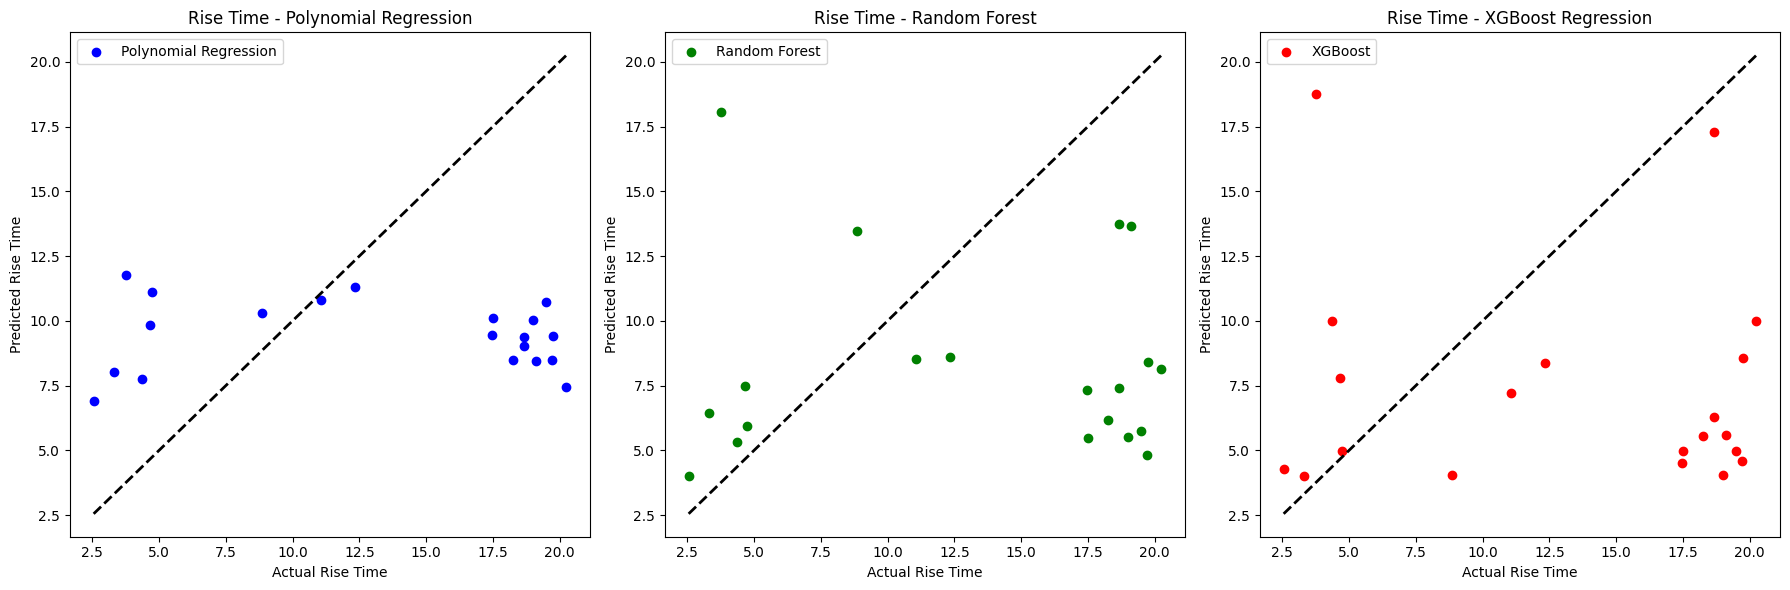

In [9]:
import matplotlib.pyplot as plt

# Define subplots for SSE and Rise Time predictions vs actuals (Separate for each model)

# Subplots for SSE
fig, axes_sse = plt.subplots(1, 3, figsize=(18, 6))

# SSE: Polynomial Regression
axes_sse[0].scatter(y_test_sse, y_pred_poly_sse, color='blue', label="Polynomial Regression")
axes_sse[0].plot([y_test_sse.min(), y_test_sse.max()], [y_test_sse.min(), y_test_sse.max()], 'k--', lw=2)
axes_sse[0].set_title("SSE - Polynomial Regression")
axes_sse[0].set_xlabel("Actual SSE")
axes_sse[0].set_ylabel("Predicted SSE")
axes_sse[0].legend()

# SSE: Random Forest Regression
axes_sse[1].scatter(y_test_sse, y_pred_rf_sse, color='green', label="Random Forest")
axes_sse[1].plot([y_test_sse.min(), y_test_sse.max()], [y_test_sse.min(), y_test_sse.max()], 'k--', lw=2)
axes_sse[1].set_title("SSE - Random Forest")
axes_sse[1].set_xlabel("Actual SSE")
axes_sse[1].set_ylabel("Predicted SSE")
axes_sse[1].legend()

# SSE: XGBoost Regression
axes_sse[2].scatter(y_test_sse, y_pred_xgb_sse, color='red', label="XGBoost")
axes_sse[2].plot([y_test_sse.min(), y_test_sse.max()], [y_test_sse.min(), y_test_sse.max()], 'k--', lw=2)
axes_sse[2].set_title("SSE - XGBoost Regression")
axes_sse[2].set_xlabel("Actual SSE")
axes_sse[2].set_ylabel("Predicted SSE")
axes_sse[2].legend()

plt.tight_layout()
plt.show()

# Subplots for Rise Time
fig, axes_rt = plt.subplots(1, 3, figsize=(18, 6))

# Rise Time: Polynomial Regression
axes_rt[0].scatter(y_test_rise_time, y_pred_poly_rise_time, color='blue', label="Polynomial Regression")
axes_rt[0].plot([y_test_rise_time.min(), y_test_rise_time.max()], [y_test_rise_time.min(), y_test_rise_time.max()], 'k--', lw=2)
axes_rt[0].set_title("Rise Time - Polynomial Regression")
axes_rt[0].set_xlabel("Actual Rise Time")
axes_rt[0].set_ylabel("Predicted Rise Time")
axes_rt[0].legend()

# Rise Time: Random Forest Regression
axes_rt[1].scatter(y_test_rise_time, y_pred_rf_rise_time, color='green', label="Random Forest")
axes_rt[1].plot([y_test_rise_time.min(), y_test_rise_time.max()], [y_test_rise_time.min(), y_test_rise_time.max()], 'k--', lw=2)
axes_rt[1].set_title("Rise Time - Random Forest")
axes_rt[1].set_xlabel("Actual Rise Time")
axes_rt[1].set_ylabel("Predicted Rise Time")
axes_rt[1].legend()

# Rise Time: XGBoost Regression
axes_rt[2].scatter(y_test_rise_time, y_pred_xgb_rise_time, color='red', label="XGBoost")
axes_rt[2].plot([y_test_rise_time.min(), y_test_rise_time.max()], [y_test_rise_time.min(), y_test_rise_time.max()], 'k--', lw=2)
axes_rt[2].set_title("Rise Time - XGBoost Regression")
axes_rt[2].set_xlabel("Actual Rise Time")
axes_rt[2].set_ylabel("Predicted Rise Time")
axes_rt[2].legend()

plt.tight_layout()
plt.show()


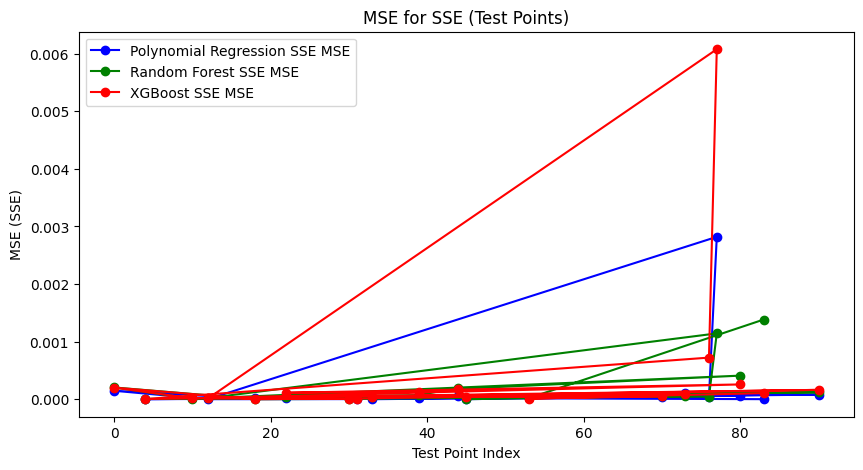

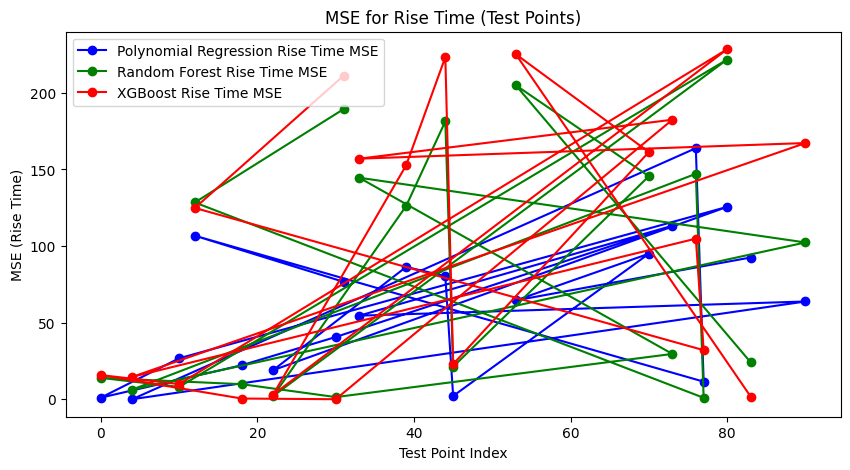

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Calculating the squared errors (MSE for each test point)
mse_poly_sse = (y_test_sse - y_pred_poly_sse) ** 2
mse_rf_sse = (y_test_sse - y_pred_rf_sse) ** 2
mse_xgb_sse = (y_test_sse - y_pred_xgb_sse) ** 2

mse_poly_rise_time = (y_test_rise_time - y_pred_poly_rise_time) ** 2
mse_rf_rise_time = (y_test_rise_time - y_pred_rf_rise_time) ** 2
mse_xgb_rise_time = (y_test_rise_time - y_pred_xgb_rise_time) ** 2

# Plotting the MSE for SSE
plt.figure(figsize=(10, 5))
plt.plot(mse_poly_sse, 'bo-', label='Polynomial Regression SSE MSE')
plt.plot(mse_rf_sse, 'go-', label='Random Forest SSE MSE')
plt.plot(mse_xgb_sse, 'ro-', label='XGBoost SSE MSE')
plt.title('MSE for SSE (Test Points)')
plt.xlabel('Test Point Index')
plt.ylabel('MSE (SSE)')
plt.legend()
plt.show()

# Plotting the MSE for Rise Time
plt.figure(figsize=(10, 5))
plt.plot(mse_poly_rise_time, 'bo-', label='Polynomial Regression Rise Time MSE')
plt.plot(mse_rf_rise_time, 'go-', label='Random Forest Rise Time MSE')
plt.plot(mse_xgb_rise_time, 'ro-', label='XGBoost Rise Time MSE')
plt.title('MSE for Rise Time (Test Points)')
plt.xlabel('Test Point Index')
plt.ylabel('MSE (Rise Time)')
plt.legend()
plt.show()
